# Welcome to My Project Notebook 
### By Ronan Noonan student number G00384824
### Atlantic Technological University 

<hr>

# Introduction 

Quantum computing, an emerging field of technology, promises to revolutionize the way we compute. While classical computers use bits to process information in binary form (0s and 1s), quantum computers use quantum bits, or qubits. These qubits have the extraordinary capability of being in a superposition of states, enabling them to represent both 0 and 1 simultaneously. One of the algorithms that demonstrated the potential advantages of quantum over classical computing is Deutsch's Algorithm. This algorithm, although simple, sets the foundation for more complex quantum algorithms and highlights the vast potential of quantum computing. 
<a href="https://www.microwavejournal.com/articles/34557-understanding-quantum-computing?gclid=CjwKCAjwkY2qBhBDEiwAoQXK5Z1eUpxYgFqZNcRWN5mByzt5-V-Pbip8bXbN6lrprD55tIepS5UFuRoCI6QQAvD_BwE">Quantum Computing</a>

#  Understanding Quantum Computing

### Explain Quantum Computing
Quantum computing harnesses the nuances of quantum mechanics, using qubits that can be both 0 and 1 simultaneously, thanks to superposition. Coupled with entanglement, where qubits influence each other regardless of distance, quantum computers can process complex calculations rapidly, unlocking potentials in areas like cryptanalysis and materials research. 
<a href="https://www.microwavejournal.com/articles/34557-understanding-quantum-computing?gclid=CjwKCAjwkY2qBhBDEiwAoQXK5Z1eUpxYgFqZNcRWN5mByzt5-V-Pbip8bXbN6lrprD55tIepS5UFuRoCI6QQAvD_BwE">Quantum Computing</a>

The following are some possible uses for quantum computing:
- Cryptography: Designing unbreakable encryption systems.

- Drug Discovery: Accelerating the process of identifying drug molecules.

- Machine Learning: Enhancing clustering and classification techniques.

<a href="https://jpt.spe.org/quantum-computing-emerges-game-changer?gad_source=1&gclid=CjwKCAjwkY2qBhBDEiwAoQXK5bBLHiUR52BwVdOlnhhH5UKWl2Lq9hNGyWfQqyRi1Q43FpsUrHUD7BoCFEYQAvD_BwE">Understanding Quantum Computing</a>

### Explain Qubits
The basic building blocks of quantum computing are called qubits, short for "quantum bits." Qubits, in contrast to classical bits, have the ability to superimpose both {0} and {1}. 
#### Superposition:
One of the main characteristics that allows quantum computers to execute several calculations at once is superposition, which permits a qubit to exist in different states simultaneously.
#### Entanglement:
No matter how far apart two qubits are from one another, their states are interdependent when they get entangled. It is this strange and paradoxical occurrence that gives rise to quantum computers' formidable parallel processing capabilities.
<a href="https://azure.microsoft.com/en-us/resources/azure-quantum/">Microsoft Quantum</a>

### Quantum Gates and Circuits
Quantum computers employ quantum gates to execute operations on qubits, just as classical computers use logic gates (AND, OR, NOT) to conduct operations on bits. These quantum gates operate on the qubit's state, utilizing entanglement and superposition to carry out several simultaneous calculations.

For example, when applied to a qubit, the Hadamard gate (commonly represented by the symbol {H}) produces a superposition of {0} and {1}. Then, to conduct increasingly sophisticated tasks, numerous quantum gates are combined to construct quantum circuits.

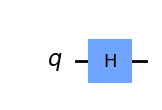

In [1]:
# Sample Python code using Qiskit to apply a Hadamard gate
from qiskit import QuantumCircuit

# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)

# Apply Hadamard gate to the qubit
qc.h(0)

# Visualize the circuit
qc.draw('mpl')


# References

1. [Quantum Computing](https://www.microwavejournal.com/articles/34557-understanding-quantum-computing?gclid=CjwKCAjwkY2qBhBDEiwAoQXK5Z1eUpxYgFqZNcRWN5mByzt5-V-Pbip8bXbN6lrprD55tIepS5UFuRoCI6QQAvD_BwE)
2. [Understanding Quantum Computing](https://jpt.spe.org/quantum-computing-emerges-game-changer?gad_source=1&gclid=CjwKCAjwkY2qBhBDEiwAoQXK5bBLHiUR52BwVdOlnhhH5UKWl2Lq9hNGyWfQqyRi1Q43FpsUrHUD7BoCFEYQAvD_BwE)